Simple linear Regression allows us to underestand relationship between two contimous variables

## Example of simple liner Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

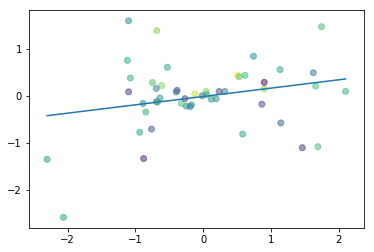

In [2]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)))

plt.scatter(x, y, c = colors, alpha=0.5)
plt.show()

## Build a liner regression model with pytorch

In [3]:
x_value = [i for i in range(11)]
x_value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# convert to numpy
x_train = np.array(x_value, dtype=np.float32)

In [5]:
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
# y = 2x + 1
y_value = [2 * i + 1 for i in x_value]
y_value

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [7]:
y_train = np.array(y_value, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

## Building Model

In [8]:
import torch
from torch.autograd import Variable
import torch.nn as nn

### Create model
1. Liner model
    * True eqn : y = 2x + 1
2. Forward
    * Example
        * input x = 1
        * y = ?

In [9]:
# create class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
   
        out = self.linear(x)
        
        return out

In [13]:
input_dim, output_dim = 1, 1
model = LinearRegressionModel(input_dim, output_dim)


In [14]:
# MSE Loss = Mean Squered Error

criteration = nn.MSELoss()

In [15]:
# Optimizer Class

learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

**Train Model**


In [16]:
a = time.time()
epochs = 100

for epoch in range(1, epochs+1):
    
    # Convert Numpy array to torch
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear Gradeients WRT
    optimizer.zero_grad()
    
    # Forward to get output 
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criteration(outputs, labels)
    
    # Getting Gradients w.r.t param
    loss.backward()
    
    # Updating Parm
    optimizer.step()
    
    print('Epocs', epoch, 'loss', loss.item())
    
print('Cpu Time', time.time() - a)
del a

Epocs 1 loss 172.5581817626953
Epocs 2 loss 170.781005859375
Epocs 3 loss 169.01327514648438
Epocs 4 loss 167.25514221191406
Epocs 5 loss 165.50677490234375
Epocs 6 loss 163.76832580566406
Epocs 7 loss 162.0399169921875
Epocs 8 loss 160.3217315673828
Epocs 9 loss 158.61387634277344
Epocs 10 loss 156.91650390625
Epocs 11 loss 155.22975158691406
Epocs 12 loss 153.55372619628906
Epocs 13 loss 151.8885498046875
Epocs 14 loss 150.23434448242188
Epocs 15 loss 148.5912322998047
Epocs 16 loss 146.9592742919922
Epocs 17 loss 145.338623046875
Epocs 18 loss 143.72930908203125
Epocs 19 loss 142.13145446777344
Epocs 20 loss 140.5451202392578
Epocs 21 loss 138.9703826904297
Epocs 22 loss 137.40731811523438
Epocs 23 loss 135.85597229003906
Epocs 24 loss 134.31640625
Epocs 25 loss 132.78866577148438
Epocs 26 loss 131.27279663085938
Epocs 27 loss 129.76881408691406
Epocs 28 loss 128.27676391601562
Epocs 29 loss 126.79668426513672
Epocs 30 loss 125.32857513427734
Epocs 31 loss 123.87245178222656
Epocs 3

In [17]:
# Compare data
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[0.21756734],
       [1.1402384 ],
       [2.0629096 ],
       [2.9855807 ],
       [3.9082518 ],
       [4.830923  ],
       [5.753594  ],
       [6.676265  ],
       [7.598936  ],
       [8.521607  ],
       [9.444279  ]], dtype=float32)

In [18]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Save model**


In [19]:
torch.save(model.state_dict(), '03 Linear Regression with PyTorch.pkl')

**Load Model**

In [20]:
model.load_state_dict(torch.load("03 Linear Regression with PyTorch.pkl"))

# plot to graph


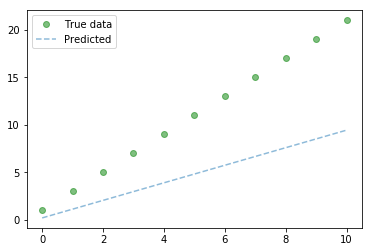

In [21]:
import matplotlib as plt
import matplotlib.pyplot as plt

plt.clf()

plt.plot(x_train,y_train,'go',label='True data',alpha=0.5)

plt.plot(x_train,predicted,'--',label='Predicted',alpha=0.5)
plt.legend(loc='best')
plt.show()

# Use GPU

In [22]:
# create class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim, output_dim = 1, 1
model = LinearRegressionModel(input_dim, output_dim)

In [23]:
# Everithing on the CPU is same as GPU
# But there is some change Let's see

if torch.cuda.is_available():
    print('Cuda Available')
    model.cuda()

In [24]:
# MSE Loss = Mean Squered Error

criteration = nn.MSELoss()

# Optimizer Class

learning_rate = 0.01

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [25]:
a = time.time()
if torch.cuda.is_available():
    print('Cuda Available')

    epochs = 100

    for epoch in range(1, epochs+1):

        # Convert Numpy array to torch
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())

        # Clear Gradeients WRT
        optimizer.zero_grad()

        # Forward to get output 
        outputs = model(inputs)

        # Calculate Loss
        loss = criteration(outputs, labels)

        # Getting Gradients w.r.t param
        loss.backward()

        # Updating Parm
        optimizer.step()

        print('Epocs', epoch, 'loss', loss.data[0])
        
print('Gpu Time', time.time() - a)

Gpu Time 0.00013828277587890625
